Classify the characters using random forest.

In [58]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
data = load_digits()

In [21]:
X = data.data
y = data.target
X.shape

(1797, 64)

In [22]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

X has 1797 images, 8 by 8 pixels per image, but already data.data has been 'ravelled' into a 64 element list.

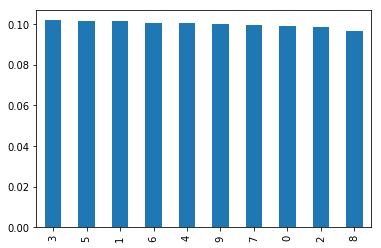

In [35]:
y_df = pd.Series(y)
y_df.value_counts(normalize=True).plot(kind='bar')

Somewhat balanced classes.

# Apply ensemble model

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

Try different models, Random forest, bagged, plus gridsearch.

In [73]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9361111111111111

First see whats a sensible range of depths to set in gridsearch.

In [75]:
for estimator in rf.estimators_:
    print(estimator.tree_.max_depth)

14
14
13
13
14
13
12
12
13
12


In [77]:
# try random forest
rf = RandomForestClassifier(random_state=42)
params = {'min_samples_leaf':[1,5,10],
            'min_samples_split':[2,5,8]}
gs = GridSearchCV(rf,param_grid=params,cv=5,n_jobs=-1)
gs.fit(X_train,y_train)
print(gs.score(X_test,y_test))
print(gs.best_params_)
# print(gs.best_score_)
# print(gs.best_estimator_)

0.925
{'min_samples_leaf': 1, 'min_samples_split': 5}


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [56]:
# try decision tree
dt = DecisionTreeClassifier(random_state=42)
params = {'max_depth':[10,20,30],
            'min_samples_split':[2,5],
            'min_samples_leaf':[1,5],
            'max_features':['auto','sqrt']}
gs = GridSearchCV(dt,param_grid=params,cv=5,n_jobs=-1)
gs.fit(X_train,y_train)
print(gs.score(X_test,y_test))
print(gs.best_params_)
# print(gs.best_score_)
# print(gs.best_estimator_)

0.8027777777777778
{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [62]:
# try extra trees
et = ExtraTreesClassifier(random_state=42)
params = {'max_depth':[10,20,30],
            'min_samples_split':[2,5],
            'min_samples_leaf':[1,5,10],
            'max_features':['auto','sqrt']}
gs = GridSearchCV(et,param_grid=params,cv=5,n_jobs=-1)
gs.fit(X_train,y_train)
print(gs.score(X_test,y_test))
print(gs.best_params_)
# print(gs.best_score_)
# print(gs.best_estimator_)

0.9583333333333334
{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
# try logistic regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print(logreg.score(X_test,y_test))
# print(gs.best_estimator_)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9611111111111111
